# IMPORTING RELEVANT LIBRARIES 

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import sqlite3

In [3]:
con = sqlite3.connect(r"D:\Python Resources\DATA\password_resources/password_data.sqlite")

In [4]:
data = pd.read_sql_query("SELECT * FROM Users", con )

# EXPLORING THE DATA

In [5]:
data.shape

(100000, 3)

In [6]:
data.head(3)

,index,password,strength
0,0,zxe870819,1
1,1,xw46454nr23l,1
2,2,soporte13,1


In [7]:
data.drop(["index"], axis = 1, inplace = True)

In [8]:
data.duplicated().sum()

0

In [9]:
data.isnull().any()

password    False
strength    False
dtype: bool

In [10]:
data.dtypes

password    object
strength     int64
dtype: object

#Object in python is equivalent to strings 

In [11]:
data['strength'].unique()

array([1, 2, 0], dtype=int64)

# PERFORMING SEMANTIC ANALYSIS 

In [12]:
type(data["password"][0])

str

#How many password texts holds only numeric character ?

In [13]:
data["password"].str.isnumeric()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Name: password, Length: 100000, dtype: bool

#Passing this filter in our data we get all the rows where password is numeric in character 

In [14]:
data[data['password'].str.isnumeric()]

,password,strength
12280,943801,0
14992,12345,0
20958,147856,0
21671,140290,0
23269,123987,0
28569,1233214,0
31329,0159456,0
32574,363761,0
37855,4524344,0
43648,5521597,0


In [15]:
data[data['password'].str.isnumeric()].shape

(26, 2)

#How many password contain only upper case character 

In [16]:
data[data['password'].str.isupper()]

,password,strength
115,EYT63119,1
273,INSPIRON6,1
338,1A2S3D4F,1
367,13269123A,1
373,YAMAZAKI82,1
...,...,...
99590,V13000993J,1
99692,65925013ABC,1
99784,01EDD055,1
99893,1UPONYOU,1


In [17]:
data[data['password'].str.isupper()].shape

(1506, 2)

#How many people have set their passwords using alphabets only- 

In [18]:
data[data['password'].str.isalpha()]

,password,strength
267,PomarancaÇ,1
1380,smgodt,0
3198,cuado,0
4560,jelsz,0
6380,demsxp,0
7803,secret,0
9218,caballo,0
11555,mhe,0
11667,kreedo,0
13645,nõmlich,0


In [19]:
data[data['password'].str.isalpha()].shape

(50, 2)

#How many passwords have alpha-numeric values ?

In [20]:
data[data['password'].str.isalnum()]

,password,strength
0,zxe870819,1
1,xw46454nr23l,1
2,soporte13,1
4,c443balg,1
5,16623670p,1
...,...,...
99995,obejofi215,1
99996,fmiopvxb64,1
99997,czvrbun38,1
99998,mymyxe430,1


In [21]:
data[data['password'].str.isalnum()].shape

(97203, 2)

#In how many passwords first alphabet is in capital letters 

In [22]:
data[data['password'].str.istitle()].shape

(932, 2)

In [23]:
data[data['password'].str.istitle()]

,password,strength
64,Hisanthoshjasika0,2
242,Therockrockbottom72,2
338,1A2S3D4F,1
367,13269123A,1
526,Csicskarozsika1,2
...,...,...
99168,1053815198M,1
99192,Alfranx05122023,2
99375,Kensington1956,2
99590,V13000993J,1


#How many passwords have some special character ?

In [24]:
import string 

In [25]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [26]:
def find_semantics(row):
    for char in row:
        if char in string.punctuation:
            return 1 
        else:
            pass

In [27]:
data['password'].apply(find_semantics) == 1

0        False
1        False
2        False
3         True
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Name: password, Length: 100000, dtype: bool

In [28]:
data[data['password'].apply(find_semantics) ==1 ]

,password,strength
3,accounts6000webhost.com,2
68,12463773800+,1
98,p.r.c.d.g.,1
145,cita-cita,1
180,karolina.susnina0U,2
...,...,...
99748,maiselis.com,1
99845,hosting4meze!@#,2
99954,semista_bakung15,2
99980,halflife2010!LEB,2


# FEATURE ENGINEERING 

#Calculating the password strength 

In [29]:
data['length'] = data['password'].str.len()

In [30]:
def freq_lowercase(row):
    return len([char for char in row if char.islower()])/len(row)

In [31]:
def freq_uppercase(row):
    return len([char for char in row if char.isupper()])/len(row)

In [32]:
def freq_numerical_case(row):
    return len([char for char in row if char.isdigit()])/len(row)

In [33]:
data['lowercase_freq'] = np.round(data['password'].apply(freq_lowercase), 3)
data['uppercase_freq'] = np.round(data['password'].apply(freq_uppercase), 3)
data['digit_frequency'] = np.round(data['password'].apply(freq_numerical_case), 3)

In [34]:
data.head(3)

,password,strength,length,lowercase_freq,uppercase_freq,digit_frequency
0,zxe870819,1,9,0.333,0.0,0.667
1,xw46454nr23l,1,12,0.417,0.0,0.583
2,soporte13,1,9,0.778,0.0,0.222


#If any character is neither alphabet nor numeric than we can treat it as a special character 

In [35]:
def frequency_special_case(row):
    special_chars = []
    for char in row:
        if not char.isalpha() and not char.isdigit():
            special_chars.append(char)
    return len(special_chars)
            

In [36]:
data['special_char_freq'] = np.round(data['password'].apply(frequency_special_case), 3)

In [37]:
data.head(5)

,password,strength,length,lowercase_freq,uppercase_freq,digit_frequency,special_char_freq
0,zxe870819,1,9,0.333,0.0,0.667,0
1,xw46454nr23l,1,12,0.417,0.0,0.583,0
2,soporte13,1,9,0.778,0.0,0.222,0
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,1
4,c443balg,1,8,0.625,0.0,0.375,0


In [38]:
data['special_char_freq'] = data['special_char_freq']/data['length'] 

In [39]:
data.head()

,password,strength,length,lowercase_freq,uppercase_freq,digit_frequency,special_char_freq
0,zxe870819,1,9,0.333,0.0,0.667,0.000000
1,xw46454nr23l,1,12,0.417,0.0,0.583,0.000000
2,soporte13,1,9,0.778,0.0,0.222,0.000000
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,0.043478
4,c443balg,1,8,0.625,0.0,0.375,0.000000


# PERFORMING DATA ANALYSIS 

In [40]:
data.columns

Index(['password', 'strength', 'length', 'lowercase_freq', 'uppercase_freq',
       'digit_frequency', 'special_char_freq'],
      dtype='object')

In [41]:
data[['length', 'strength']].groupby(['strength']).agg(['min','max','mean', 'median'])

length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0

In [42]:
cols = ['length', 'lowercase_freq', 'uppercase_freq',
       'digit_frequency', 'special_char_freq']
for col in cols:
    print(col)
    print(data[[col, 'strength']].groupby(['strength']).agg(['min','max','mean', 'median']))
    print('\n')

length
         length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0


lowercase_freq
         lowercase_freq                        
                    min    max      mean median
strength                                       
0                   0.0  1.000  0.708050  0.714
1                   0.0  0.923  0.630067  0.667
2                   0.0  0.917  0.424679  0.400


uppercase_freq
         uppercase_freq                        
                    min    max      mean median
strength                                       
0                   0.0  1.000  0.012872  0.000
1                   0.0  0.923  0.007915  0.000
2                   0.0  0.889  0.367633  0.429


digit_frequency
         digit_frequency                        
                     min    max      mean median
strength                         

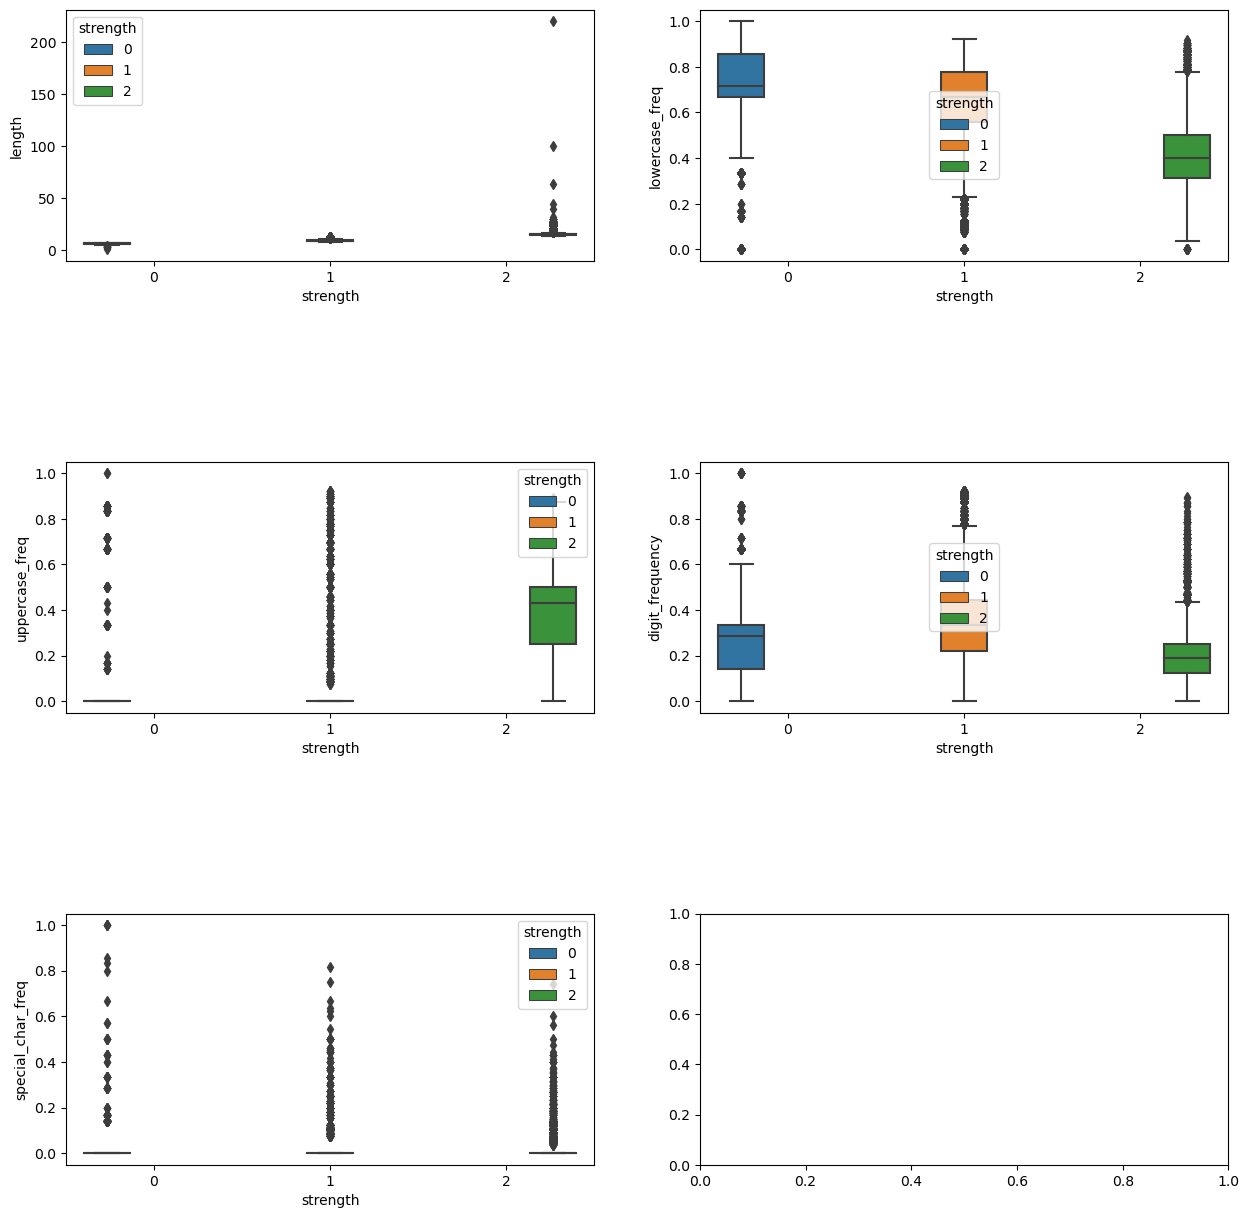

In [43]:
fig, ((ax1, ax2), (ax3,ax4), (ax5,ax6)) = plt.subplots(3, 2, figsize=(15,15))

sns.boxplot(x="strength", y= 'length', hue= "strength", ax = ax1, data = data)
sns.boxplot(x="strength", y= 'lowercase_freq', hue= "strength", ax = ax2, data = data)
sns.boxplot(x="strength", y= 'uppercase_freq' , hue= "strength", ax = ax3, data = data)
sns.boxplot(x="strength", y= 'digit_frequency' , hue= "strength", ax = ax4, data = data)
sns.boxplot(x="strength", y= 'special_char_freq', hue= "strength", ax = ax5, data = data)
plt.subplots_adjust(hspace = 0.8)

# FEATURE IMPORTANCE

#Univariate Analysis 

In [44]:
#violin plot is the combination of box plot and distribution plot
#Distribution plot typically returns us density 

In [45]:
def get_dist(data, feature):
    plt.figure(figsize=(10,8))
    plt.subplot(1,2,1)
    sns.violinplot(x = 'strength', y = feature, data=data)
    plt.subplot(1,2,2)
    sns.distplot(data[data['strength']==0][feature],color="red",label = "0",hist = False)
    sns.distplot(data[data['strength']==1][feature],color="blue",label = "1",hist = False)
    sns.distplot(data[data['strength']==2][feature],color="orange",label = "2", hist = False)
    plt.legend()
    plt.show()
    
    

In [46]:
import warnings 
from warnings import filterwarnings 
filterwarnings("ignore")

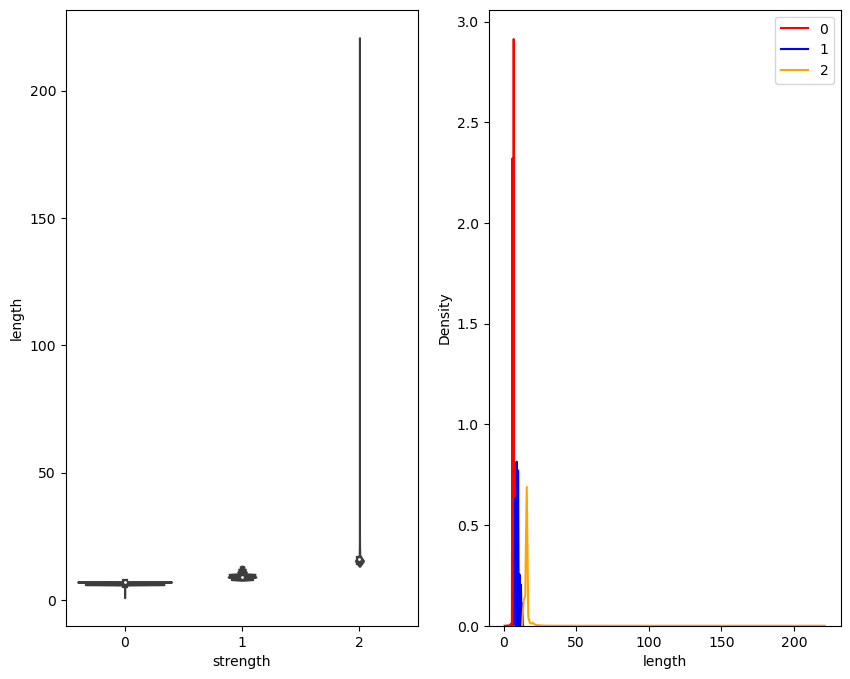

In [47]:
get_dist(data, "length")

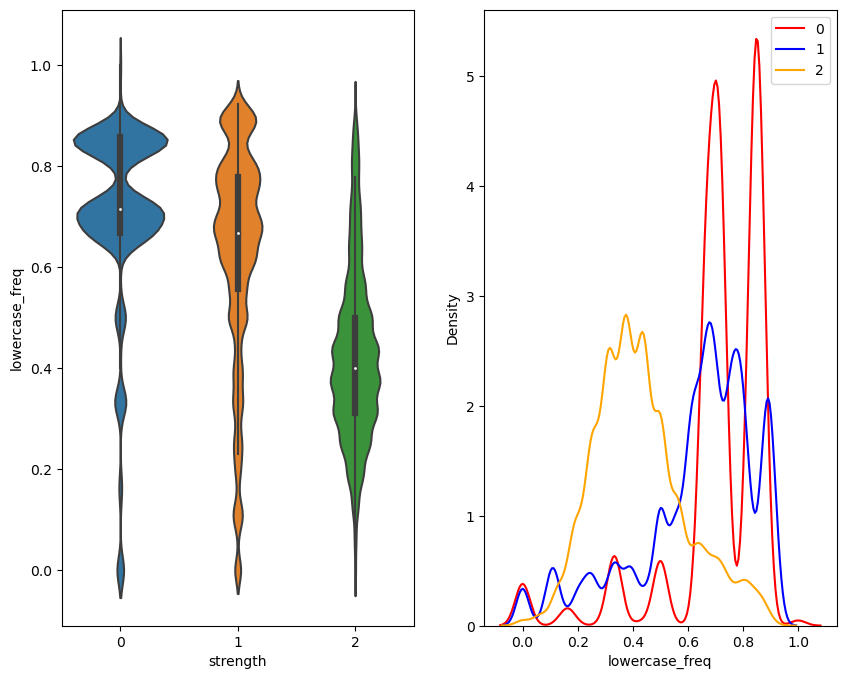

In [48]:
get_dist(data, 'lowercase_freq')

#Note that we have some overlapping region in density plot 

#Since Machine learning doesn't support string data, we have to convert our string data into some kind of numeric data 

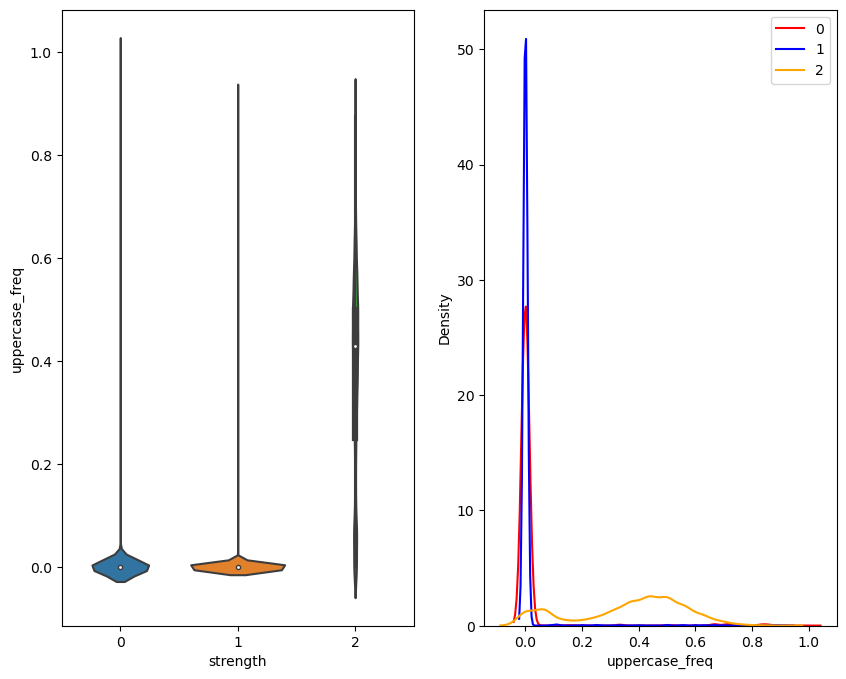

In [49]:
get_dist(data, 'uppercase_freq')

In [50]:
data.columns

Index(['password', 'strength', 'length', 'lowercase_freq', 'uppercase_freq',
       'digit_frequency', 'special_char_freq'],
      dtype='object')

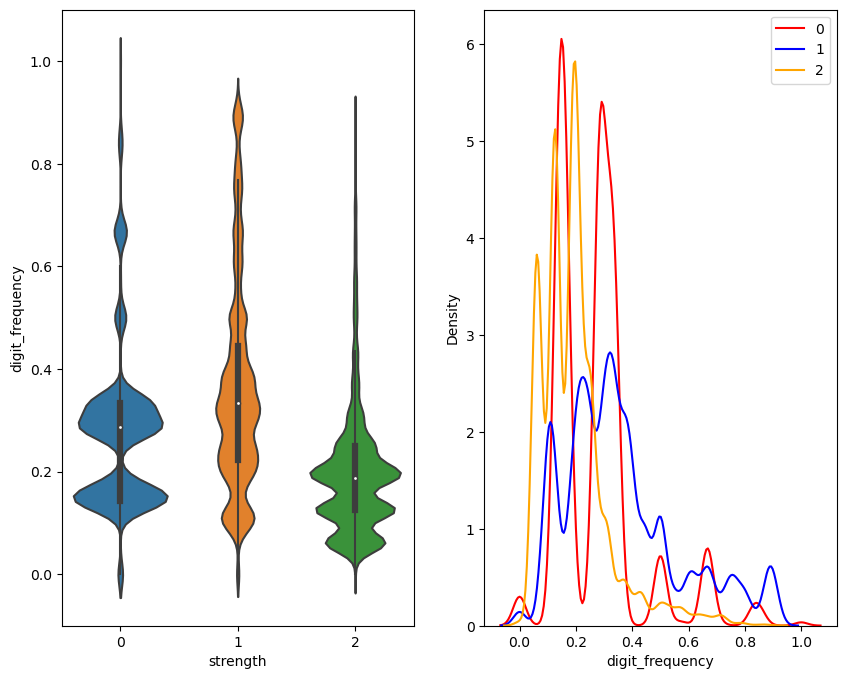

In [51]:
get_dist(data, 'digit_frequency')

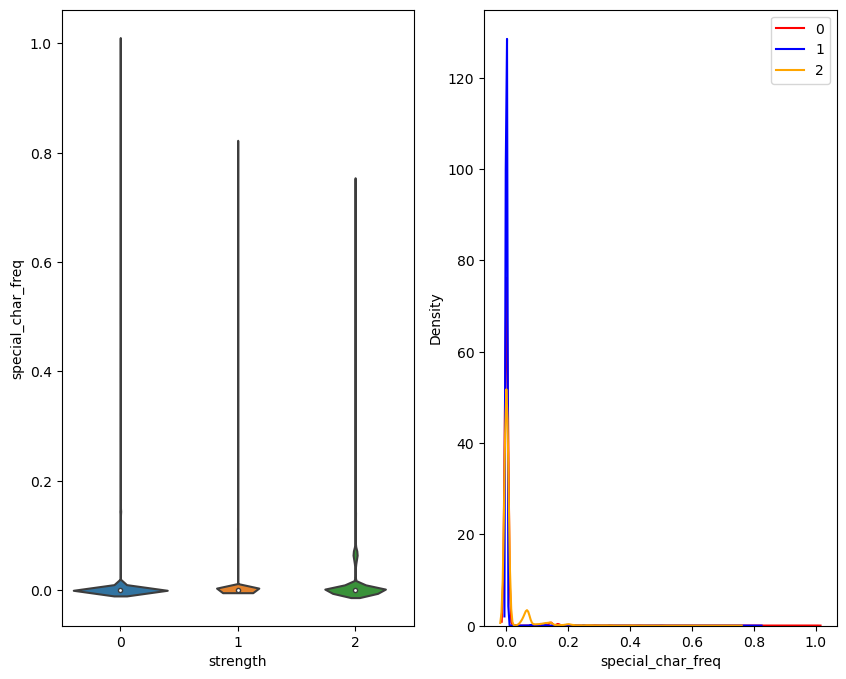

In [52]:
get_dist(data, 'special_char_freq')

#from this violin plot you can say that lower count of special character are good for the high strength 

#since we have lot of overlapping feature we can say that this special character frequecny feature is not that useful 

# NLP TECHNIQUE FOR CONVERTING TEXT TO VECTOR 

#Shuffling the data

In [53]:
dataframe = data.sample(frac=1)

In [54]:
dataframe

,password,strength,length,lowercase_freq,uppercase_freq,digit_frequency,special_char_freq
82524,OZGPTvDQ4Ngbn3Gt,2,16,0.312,0.562,0.125,0.0
47460,yjoto857,1,8,0.625,0.000,0.375,0.0
30115,dhinyzac8,1,9,0.889,0.000,0.111,0.0
28758,pengusaha1,1,10,0.900,0.000,0.100,0.0
10215,yvoroq722,1,9,0.667,0.000,0.333,0.0
...,...,...,...,...,...,...,...
48053,asmah1012,1,9,0.556,0.000,0.444,0.0
99375,Kensington1956,2,14,0.643,0.071,0.286,0.0
27517,aloqebi717,1,10,0.700,0.000,0.300,0.0
15721,aixiaolan12,1,11,0.818,0.000,0.182,0.0


In [55]:
x = list(dataframe['password'])

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [57]:
vectorizer = TfidfVectorizer(analyzer="char")

In [58]:
X = vectorizer.fit_transform(x)

In [59]:
X.shape

(100000, 99)

In [60]:
dataframe["password"].shape

(100000,)

In [61]:
X

<100000x99 sparse matrix of type '<class 'numpy.float64'>'
	with 842571 stored elements in Compressed Sparse Row format>

In [62]:
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [63]:
X.toarray()[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.17272136, 0.19070858,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.21519189, 0.        ,
       0.1933473 , 0.        , 0.        , 0.61130238, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.33004122, 0.15773321, 0.21193295, 0.24314399, 0.        ,
       0.        , 0.36406887, 0.        , 0.23202471, 0.        ,
       0.        , 0.        , 0.22845806, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

#so this is the vector representation of our very best password 

In [64]:
dataframe["password"]

82524    OZGPTvDQ4Ngbn3Gt
47460            yjoto857
30115           dhinyzac8
28758          pengusaha1
10215           yvoroq722
               ...       
48053           asmah1012
99375      Kensington1956
27517          aloqebi717
15721         aixiaolan12
8148              komax33
Name: password, Length: 100000, dtype: object

In [65]:
len(vectorizer.get_feature_names_out())

99

In [66]:
df2 = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

In [67]:
df2

,,,,,,,,,!,#,...,ñ,ó,õ,ö,÷,ú,ü,ý,þ,›
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# MODEL BUILDING 

In [68]:
df2['length'] = dataframe['length']
df2['lowercase_freq'] = dataframe['lowercase_freq']


In [69]:
df2

,,,,,,,,,!,#,...,õ,ö,÷,ú,ü,ý,þ,›,length,lowercase_freq
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.333
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,0.417
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.778
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23,0.783
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0.625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,0.700
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,0.800
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.778
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.667


In [70]:
y = dataframe['strength']

In [71]:
from sklearn.model_selection import train_test_split 

In [72]:
x_train,x_test,y_train,y_test = train_test_split(df2,y,test_size=0.20,random_state=42)

In [73]:
x_train.shape

(80000, 101)

In [74]:
y_train.shape

(80000,)

In [75]:
from sklearn.linear_model import LogisticRegression 
clf = LogisticRegression(multi_class="multinomial")
clf.fit(x_train, y_train)

LogisticRegression(multi_class='multinomial')

In [76]:
y_pred = clf.predict(x_test)
y_pred

array([1, 1, 2, ..., 1, 1, 1], dtype=int64)

In [77]:
from collections import Counter
Counter(y_pred)

Counter({1: 17275, 2: 1879, 0: 846})

# Making Prediction Based on the Model 

In [78]:
password = "%@123abcd"  

In [79]:
sample_array = np.array([password])

In [81]:
sample_matrix = vectorizer.transform(sample_array)

#This is nothing but the vector representation of the above array

In [82]:
sample_matrix.toarray().shape

(1, 99)

In [83]:
len(password)

9

In [84]:
[char for char in password if char.islower()]

['a', 'b', 'c', 'd']

In [86]:
len([char for char in password if char.islower()])/len(password)

0.4444444444444444

In [87]:
np.append(sample_matrix.toarray(), (9,0.444))

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.71897928, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.14344586, 0.1659599 , 0.18587581, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.48741481, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.13814351, 0.23158091, 0.21637656,
       0.20807263, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [88]:
np.append(sample_matrix.toarray(), (9,0.444)).shape

(101,)

In [90]:
new_matrix = np.append(sample_matrix.toarray(), (9,0.444)).reshape(1,101)

In [91]:
clf.predict(new_matrix)

array([0], dtype=int64)

# AUTOMATING THE ENTIRE PROCESS USING A FUNCITON 

In [94]:
def predict():
    password = input("Enter a password: ")
    sample_array = np.array([password])
    sample_matrix = vectorizer.transform(sample_array)
    length_password = len(password)
    length_normalised_lowercase = len([char for char in password if char.islower()])/len(password)
    np.append(sample_matrix.toarray(), (length_password, length_normalised_lowercase)).reshape(1,101)
    result = clf.predict(new_matrix)
    
    if result == 0 :
        return "password is weak"
    elif result == 1 :
        return "password is normal"
    else:
        return "password is strong"

    

In [95]:
predict()

Enter a password: ksjalfhwoi 


'password is weak'

In [98]:
predict()

Enter a password: shanfoah897


'password is weak'

# Checking Accuracy of The Model 

In [99]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [101]:
accuracy_score(y_test, y_pred)

0.79345

In [103]:
confusion_matrix(y_test, y_pred)

array([[  456,  2252,     8],
       [  345, 13986,   444],
       [   45,  1037,  1427]], dtype=int64)

In [104]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.54      0.17      0.26      2716
           1       0.81      0.95      0.87     14775
           2       0.76      0.57      0.65      2509

    accuracy                           0.79     20000
   macro avg       0.70      0.56      0.59     20000
weighted avg       0.77      0.79      0.76     20000

